# 2 Variable Selection
Considering the fact that the sample size is relatively small, a full model must include redundant variables, which leads to problems such as overfitting and collinearity. Also, it's common sense that users are more willing to use a simple model. Therefore, in this section, we use exhaustive model selection method to select variables under several criteria (AIC, BIC, Mallow's Cp and $\delta R^2$). Then we use $k$-fold to choose the best model with least MSE (Mean Squared Error). Note: In the following analysis, we suppose the largest number of features to be selected is 8. 
## 2.1 Possible models
By the help of <font style="font-family: courier">regsubset()</font> from the <font style="font-family: courier">leaps</font> package, we defined a function <font style="font-family: courier">my.regsub()</font> to record the best models for number of features from 1 to 8 and the corresponding values of different criteria. 

In [1]:
library("leaps")
bodyfat.dat=read.csv("../data/cleanfile.csv")
my.regsub <- function(matrix,y,nbest,method,nvmax=8){
  n<-length(y) #sample size
  k=(2:(nvmax+1)) #possible numbers of coefficients
  temp <- regsubsets(matrix,y,nbest=nbest,method=method,nvmax=nvmax)
  temp.mat <- cbind(summary(temp)$which,summary(temp)$cp,
                    n*log(2*pi)+n*log(summary(temp)$rss/(n-k))+n+k+2,
                    n*log(2*pi)+n*log(summary(temp)$rss/(n-k))+n-k+(k+1)*log(n),
                    1-summary(temp)$rss/sum((y-mean(y))^2))
  dimnames(temp.mat)[[2]] <- c(dimnames(summary(temp)$which)[[2]],
                               "cp", "aic", "bic","r_square")
  return(temp.mat)
}

Run the following code and we can get several possible models.

In [8]:
regsub.mat<-my.regsub(bodyfat.dat[,-c(1,2)],bodyfat.dat$BODYFAT,nbest=1,method = "exhaustive")

| Criteria | Model |
|:----------------|:-----------------------------------------------------------------------|
| AIC | BODY~AGE+HEIGHT+NECK+CHEST+ABDOMEN+FOREARM+WRIST |  
| BIC | BODY~WEIGHT+ABDOMEN+WRIST | 
| $C_p$ | BODY~AGE+HEIGHT+NECK+CHEST+ABDOMEN+FOREARM+WRIST | 

We also draw a plot of best models' $R^2$ against the number of features.

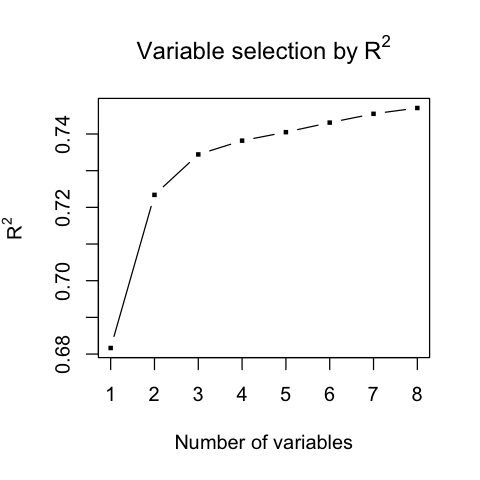

In [25]:
options(repr.plot.width=4, repr.plot.height=4)
plot(regsub.mat[,"r_square"],type="b",
     main=bquote("Variable selection by"~R^2),
     xlab="Number of variables",
     ylab=expression(R^2),
     cex=0.5,pch=15
)

We observe this plot and find that two or three variables has already explained the response well enough. Adding more features doesn't bring significant increases to $R^2$ and meanwhile make the model more complex. In other words, there's a tradeoff between the accuracy and complexity of the model. By $R^2$ criteria, we decide to keep the first two models, i.e.

BODY~WEIGHT+ABDOMEN+WRIST

BODY~WEIGHT+ABDOMEN


## 2.2 Final Model
There are totally three models to be selected now, and we use 4-fold cross validation to find the best one:

|| Model | MSE |
|--|:----------------|:-----------------------------------------------------------------------|
|1|BODY~WEIGHT+ABDOMEN|16.37278|
|2|BODY~WEIGHT+ABDOMEN+WRIST|15.82713|
|3|BODY~AGE+HEIGHT+NECK+CHEST+ABDOMEN+FOREARM+WRIST|15.77739|


We can see that the MSE increases as the number of features increases, but it doesn't change so much from model2 to model3. Therefore, we finally choose WEIGHT, ABDOMEN and WRIST to be the explanatory variables.

## 2.2.1 Model Evaluation
